# Skin cancer classification challenge

**Summary :** Skin cancer classification

## Preliminaries and Imports

In [1]:
import json
import collections
from PIL import Image
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = 10, 10  #default setting
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

## I. Load metadata

- **Rq : ** Datasets are quite light, can be fully loaded in a laptop memory with ease.

In [2]:
#Set all paths for data
train_path = "../data/Donnees_apprentissage/"
test_path = "../data/Donnees_test/"
resized_folder = "../data/resized_train"
resized_folder_ = "../data/resized_test"


#create a target forlder for resized pictures
if not os.path.exists(resized_folder):
    os.makedirs(resized_folder)
    
if not os.path.exists(resized_folder_):
    os.makedirs(resized_folder_)

In [3]:
#saving file:
meta = pd.read_csv("../data/label_learn.csv",sep = ";")

In [4]:
meta.head()

,name,label
0,0000000.jpg,benign
1,0000002.jpg,malignant
2,0000006.jpg,benign
3,0000008.jpg,benign
4,0000009.jpg,benign


- **Data integrity check**

In [5]:
#data integrity check
#variable types
def summaryze(df):
    summary =  pd.DataFrame()
    summary["column"] = list(df.columns)
    summary["type"] = list(df.dtypes)
    summary["nb_missing_values"] = list(df.isnull().sum())
    summary["nb_missing_values%"] = summary["nb_missing_values"]/len(df)*100
    summary.set_index("column",inplace=True)
    return summary

In [6]:
summaryze(meta)

,type,nb_missing_values,nb_missing_values%
column,,,
name,object,0,0.0
label,object,0,0.0


> ** First interpretations : **
- Image datas are stored in band_1 and band_2 as matrix
- Training set contains only 1 604 rows... warning! Data augmentation and other tricks are to be considered.
- Inc_angle nature (?)

# II. Treat and resize pictures

In [7]:
%%time
#purge target folder
target  = "../data/resized_test/"
filelist = [ f for f in os.listdir(target) if f.endswith(".jpg") ]
for f in filelist:
    os.remove(os.path.join(target, f))

CPU times: user 16 ms, sys: 232 ms, total: 248 ms
Wall time: 256 ms


In [8]:
def pad_center(img):
    longer_side = max(img.size)
    horizontal_padding = (longer_side - img.size[0]) / 2
    vertical_padding = (longer_side - img.size[1]) / 2
    img = img.crop(
        (
            -horizontal_padding,
            -vertical_padding,
            img.size[0] + horizontal_padding,
            img.size[1] + vertical_padding
        )
    )
    return img

def crop_square(img):
    min_side = min(img.size)/2
    half_the_width = img.size[0] / 2
    half_the_height = img.size[1] / 2
    img = img.crop(
        (
            half_the_width - min_side,
            half_the_height - min_side,
            half_the_width + min_side,
            half_the_height + min_side
        )
    )
    return img

In [9]:
def resize(source,target,size):
    dirs = os.listdir(source)
    dirs = [x for x in dirs if ".jpg" in x]
    for item in dirs:
        #print(source+"/"+item)
        im = Image.open(source+"/"+item)
        #f, e = os.path.splitext(source+"/"+item)
        im = pad_center(im)
        imResize = im.resize((size,size), Image.ANTIALIAS)
        imResize.save(target+item, 'JPEG', quality=100)
    return



In [10]:
dirs = os.listdir("../data/Donnees_apprentissage/")
dirs = [x for x in dirs if ".jpg" in x]
train_list = ["../data/Donnees_apprentissage/"+x for x in dirs if ".jpg" in x]

dirs = os.listdir("../data/Donnees_test/")
dirs = [x for x in dirs if ".jpg" in x]
test_list = ["../data/Donnees_test/"+x for x in dirs if ".jpg" in x]

In [11]:
len(train_list) == len(meta)

True

In [12]:
%%time

import multiprocessing as mp
import datetime

size = 299
target = "../data/resized_test/"

def resize_(file_name):
    #print(source+"/"+item)
    im = Image.open(file_name)
    #f, e = os.path.splitext(file_name)
    im = crop_square(im)
    imResize = im.resize((size,size), Image.ANTIALIAS)
    item = file_name.split("/")[3]
    imResize.save(target+item, 'JPEG', quality=100)
    return 



try:
    pool = mp.Pool(processes=14)
    start_time=datetime.datetime.now()
    result = pool.map(resize_,test_list)
    pool.close()
    pool.join()
    elapsed=datetime.datetime.now()-start_time
    print("Done processing in %s" %(elapsed))
except Exception as e:
    print(e)
    pool.close()
    pool.join()
    print('Pool successfuly closed!')

Done processing in 0:02:04.705356
CPU times: user 112 ms, sys: 108 ms, total: 220 ms
Wall time: 2min 4s


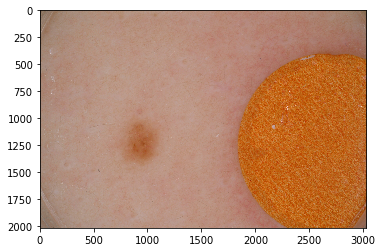

In [13]:
#resized pictures
temp = os.listdir(train_path)
temp = [x for x in temp if ".jpg" in x]
img = Image.open(train_path+temp[4])
plt.imshow(img)


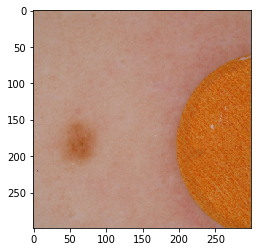

In [14]:
temp = os.listdir(train_path)
temp = [x for x in temp if ".jpg" in x]
img = Image.open("../data/resized_train/"+temp[4])
plt.imshow(img)    

**Warning : ** resizing pictures deform images? except if padding

In [15]:
#control
target  = "../data/resized_train/"
filelist = [ f for f in os.listdir(target) if f.endswith(".jpg") ]

len(meta) == len(filelist)

True

In [16]:
print(len(meta))
print(len(filelist))

8581
8581


In [18]:
target  = "../data/resized_test/"
filelist = [ f for f in os.listdir(target) if f.endswith(".jpg") ]
print(len(filelist))

4291


In [20]:
target  = "../data/Donnees_test/"
filelist = [ f for f in os.listdir(target) if f.endswith(".jpg") ]
print(len(filelist))

4291


# III. Split into train and test